<center> <h1> Библиотека Pandas </h1> <center>

Цель данной зачетной работы — изучить библиотеку и на практических примерах программного кода проиллюстрировать её использование. Использоваться будет библиотека Pandas. Pandas - библиотека, ориентированная на обработке и анализе данных, поэтому для иллюстрации понадобятся исходные данные для анализа.  

Мы будем использовать три датасета для разных целей:
- <a href='#set1'><h4>Данные о пассажирах Титаника, обработав которые через Pandas, в связке с библиотекой sklearn, мы сможем попробовать предсказать вероятность выживания для заданного пассажира, используя машинное обучение</h4></a>
- <a href='#set2'><h4>Данные об исследуемой экосистеме в южной Аризоне, которые мы обработаем и визуализируем в связке с библиотекой matplotlib/seaborn</h4></a>
- <a href='#set3'><h4>•	Данные о книгах, находящихся в Британской Библиотеке, в которых нужно будет откорректировать некачественные/неверные данные</h4></a>



<p><center>Краткий список команд, использованных в данной работе:</center></p>

<table>
    <tr><td><a href='#read_csv'><center>read_csv</center></a></td><td><a href='#head'><center>head</center></a></td>
    <td><a href='#shape'><center>shape</center></a></td><td><a href='#info'><center>info</center></a></td>
    <td><a href='#groupby'><center>groupby</center></a></td><td><a href='#sum'><center>sum</center></a></td>
    <td><a href='#sort_values'><center>sort_values</center></a></td><td><a href='#tail'><center>tail</center></a></td></tr>
    <tr><td><a href='#mean'><center>mean</center></a></td><td><a href='#describe'><center>describe</center></a></td>
    <td><a href='#index'><center>index</center></a></td><td><a href='#loc'><center>loc</center></a></td>
    <td><a href='#value_counts'><center>value_counts</center></a></td><td><a href='#sample'><center>sample</center></a></td>
    <td><a href='#to_datetime'><center>to_datetime</center></a></td><td><a href='#dropna'><center>dropna</center></a></td></tr>
    <tr><td><a href='#fillna'><center>fillna</center></a></td><td><a href='#unique'><center>unique</center></a></td>
    <td><a href='#nunique'><center>nunique</center></a></td><td><a href='#crosstab'><center>crosstab</center></a></td>
    <td><a href='#to_numeric'><center>to_numeric</center></a></td><td><a href='#isnull'><center>isnull</center></a></td>
    <td><a href='#drop'><center>drop</center></a></td><td><a href='#median'><center>median</center></a></td></tr>
</table>



Для импорта данных будет использоваться функция **read_csv()**, которая принимает путь к файлу, а также может принимать параметры:
- *sep* — отвечает за разделитель, используемый в документе
- *index_col* — отвечает за номер колонки, которая будет использоваться для индексации данных
- *skip_blank_lines* — отвечает за пропуск пустых строк, принимает значение True/False
- *encoding* — отвечает за кодировку файла, принимает её имя
<br>...и прочие;

<a id='read_csv'></a>
<a id='head'></a>
### read_csv ( ), head ( ) ### 
*Сама функция **read_csv()** возвращает объект типа dataframe, который является табличной структурой данных (каждая строка/столбец является объектом типа Series), a метод **.head()** отвечает за вывод шапки исходных данных*

<a id='set1'></a>
<center><h1> Возьмем первый массив данных</h1><center>

*Этот датасет содержит данные о всех пассажирах Титаника, находящихся на борту во время катастрофы*

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble as ensemble
import sklearn.model_selection as model_selection
import joblib as joblib
import seaborn

In [104]:
dataset = pd.read_csv('./data/1_titanic/titanic.csv', encoding='utf-8', index_col=[1], parse_dates=True)
dataset.head()

,id,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
row.names,,,,,,,,,,,
999,998,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
180,179,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
557,556,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
175,174,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
1233,1232,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male


<a id='shape'></a>
### .shape  ###
*Возвращает размерность массива данных:*

In [105]:
dataset.shape

(919, 11)

*Датасет является таблицей, состоящей из 919 строк и 11 столбцов*

Мы также можем получить более подробную информацию о типах данных, как всего массива данных, так и конкретных столбцов:

In [106]:
type(dataset)

pandas.core.frame.DataFrame

In [107]:
type(dataset['name'])

pandas.core.series.Series

<a id='info'></a>
### .info( ) ###
*Возвращает данные по столбцам:*

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 999 to 671
Data columns (total 11 columns):
id           919 non-null int64
pclass       919 non-null object
survived     919 non-null int64
name         919 non-null object
age          439 non-null float64
embarked     571 non-null object
home.dest    531 non-null object
room         48 non-null object
ticket       46 non-null object
boat         233 non-null object
sex          919 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 86.2+ KB


<a id='drop'></a>
### .drop( ) ###
*Удаляет столбец массива:*

***Удалим столбец "id", дабы оставить только индексы, которые указывают на номер каюты:***

In [109]:
dataset = dataset.drop('id', 1)
dataset.head(5)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
row.names,,,,,,,,,,
999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male


<a id='groupby'></a>
### .groupby( ) ###
*Группирует данные в таблице по значению индекса:*
<a id='sum'></a>
### .sum( ) ###
*Суммирует данные в таблице по значению индекса:*
<a id='sort_values'></a>
### .sort_values( ) ###
*Сортирует данные:*

***Посмотрим, какое количество пассажиров выжило в каждом классе:***

In [110]:
dataset.groupby(['pclass'])['survived'].sum().sort_values()

pclass
2nd     86
3rd     97
1st    132
Name: survived, dtype: int64

<a id='value_counts'></a>
### .value_counts( )###
*Подсчитывает какое количество раз встречалось то или иное значение:*

***Выведем общее количество пассажиров по классам***

In [111]:
dataset['pclass'].value_counts().head(5)

3rd    494
1st    228
2nd    197
Name: pclass, dtype: int64



<a id='tail'></a>
### .tail( ) ###
*Возвращает последние элементы массива данных*

***Выделим в отдельный датасет всех мужчин:***

In [112]:
men = dataset[dataset['sex'] == 'male']
men.tail(3)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
row.names,,,,,,,,,,
1267,3rd,0,"Van Billiard, Mr Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,male
1247,3rd,0,"Thomas, Mr Charles",NaN,NaN,NaN,NaN,NaN,NaN,male
671,3rd,0,"Bengtsson, Mr John Viktor",26.0,Southampton,"Krakudden, Sweden Moune, IL",NaN,NaN,NaN,male


<a id='mean'></a>
### .mean( ) ###
*Возвращает средние значения:*

In [113]:
men.mean()

survived     0.182566
age         31.064448
dtype: float64

***Заметим, что выжило всего 18% мужчин, а средний возраст мужчин был 31***

<a id='describe'></a>
### .describe( ) ###
*Возвращаетчисленную статистику массива данных*

In [114]:
men['age'].describe()

count    278.000000
mean      31.064448
std       15.085240
min        0.333300
25%       22.000000
50%       28.500000
75%       40.000000
max       71.000000
Name: age, dtype: float64

***Максимальный возраст был 71 год, а минимальный был 4 месяца***

<a id='index'></a>
### .index ###
*Возвращает значения, по которым индексирован наш массив данных.* 

In [115]:
men.index

Int64Index([ 180,  557,  175, 1233,  731,  118,  755,  162,  535,  337,
            ...
             457,  431, 1148,  355, 1212,  825,  635, 1267, 1247,  671],
           dtype='int64', name='row.names', length=608)

***Так как наши данные проиндексированы по номеру каюты, можем вывести данные, по этому номеру:***

<a id='loc'></a>
### .loc[ ] ###
*Ищет элементы массива данных по индексу*

In [116]:
men.loc[180]['age']

65.0

***Как мы видим, пассажиру из 180-ой каюты было 65 лет***

***Также Pandas позволяет как добавлять:***

In [117]:
dataset['Column-1'] = 'Custom Column'
dataset.head(10)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Column-1
row.names,,,,,,,,,,,
999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female,Custom Column
180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male,Custom Column
557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male,Custom Column
175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male,Custom Column
1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male,Custom Column
816,3rd,1,"Georges, Mrs Shahini Weappi",NaN,Cherbourg,"Youngstown, OH",NaN,NaN,NaN,female,Custom Column
1172,3rd,0,"Sage, Miss Constance",NaN,NaN,NaN,NaN,NaN,NaN,female,Custom Column
1220,3rd,1,"Smyth, Miss Julia",NaN,NaN,NaN,NaN,NaN,NaN,female,Custom Column
731,3rd,0,"Connors, Mr Patrick",NaN,Queenstown,NaN,NaN,NaN,(171),male,Custom Column


***...так и удалять колонки:***

In [118]:
dataset = dataset.drop('Column-1', 1)
dataset.head(10)

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
row.names,,,,,,,,,,
999,3rd,1,"McCarthy, Miss Katie",NaN,NaN,NaN,NaN,NaN,NaN,female
180,1st,0,"Millet, Mr Francis Davis",65.0,Southampton,"East Bridgewater, MA",NaN,NaN,(249),male
557,2nd,0,"Sjostedt, Mr Ernst Adolf",59.0,Southampton,"Sault St Marie, ON",NaN,NaN,NaN,male
175,1st,0,"McCaffry, Mr Thomas Francis",46.0,Cherbourg,"Vancouver, BC",NaN,NaN,(292),male
1233,3rd,0,"Strilic, Mr Ivan",NaN,NaN,NaN,NaN,NaN,NaN,male
816,3rd,1,"Georges, Mrs Shahini Weappi",NaN,Cherbourg,"Youngstown, OH",NaN,NaN,NaN,female
1172,3rd,0,"Sage, Miss Constance",NaN,NaN,NaN,NaN,NaN,NaN,female
1220,3rd,1,"Smyth, Miss Julia",NaN,NaN,NaN,NaN,NaN,NaN,female
731,3rd,0,"Connors, Mr Patrick",NaN,Queenstown,NaN,NaN,NaN,(171),male


# Производим обработку датасета:

*По своей сути, данные делятся на бинарные, качественные и количественные: например, в нашем случае, качественными данными являются: номер каюты, пол пассажира и его имя, а количественным будет его возраст. Для обучения модели нам не понадобится имя пассажира, так как оно никак не влияет на шансы на выживание. Мы будем использовать колонки "класс", "пол" и "возраст", однако:*

1. У нас не хватает данных по возрасту, поэтому для пассажиров, у которых не указан возраст, укажем его как медианный для этой выборки
2. Столбец "пол" не является бинарным
3. Столбец "класс" является строчным

<a id='median'></a>
### .median( ) ###
*Возвращает медианное значение.* 

In [119]:
dataset['age'].fillna(dataset['age'].median(), inplace = True)
dataset['age'].head()

row.names
999     29.0
180     65.0
557     59.0
175     46.0
1233    29.0
Name: age, dtype: float64

In [120]:
pd.options.mode.chained_assignment = None

data_inputs = dataset[["pclass", "age", "sex"]]
data_inputs["pclass"].replace("3rd", 3, inplace = True)
data_inputs["pclass"].replace("2nd", 2, inplace = True)
data_inputs["pclass"].replace("1st", 1, inplace = True)

data_inputs["sex"] = np.where(data_inputs["sex"] == "female", 0, 1)
data_inputs.head()

,pclass,age,sex
row.names,,,
999,3,29.0,0
180,1,65.0,1
557,2,59.0,1
175,1,46.0,1
1233,3,29.0,1


*Теперь мы можем приступать к работе с моделью:*

# Использование с sklearn:

***Обозначим как ожидаемый исход параметр, выжил ли пассажир:***

In [121]:
expected_output = dataset[["survived"]]

***Опишем и обучим модель:***

In [122]:
pd.options.mode.chained_assignment = None

inputs_train, inputs_test, expected_output_train, expected_output_test = model_selection.train_test_split(data_inputs \
                                                                    , expected_output, test_size = 0.33, random_state = 42)
rf = ensemble.RandomForestClassifier (n_estimators=100)
rf.fit(inputs_train, expected_output_train.values.ravel())
accuracy = rf.score(inputs_test, expected_output_test)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 78.94736842105263%


Точность модели - около 78 процентов

***Запишем модель в файл:***

In [123]:
joblib.dump(rf, "titanic_model1", compress=9)

['titanic_model1']

***Опишем четырех случайных пассажиров:***

1. 56-летняя женщина из 1-ого класса
2. 31-летняя женщина из 2-ого класса
3. 29-летний мужчина из 2-ого класса
4. 18-летний мужчина из 3-ого класса

***И попробуем предсказать их шансы на выживание:***

In [124]:
data = pd.DataFrame({'pclass':[1, 2, 2, 3],
        'age':[56, 31, 29, 18], 
        'sex':[0,0,1,1]})
rf = joblib.load("titanic_model1")
pred = rf.predict(data)
print(pred)

[1 1 0 0]


*Исходя из модели, выживут только первые два пассажира.*

<a id='set2'></a>
<center><h1>Теперь возьмем другой массив данных:</h1></center>

*Этот датасет содержит данные о небольшой экосистеме в южной Аризоне за последние 35 лет. Он является частью большего проекта по изучению влияния различных видов грызунов и насекомых на жизнь растений*
- plots.csv : список участков исследования с их ID и кратким описанием
- species.csv : список с двухсимвольным кодом вида и информации о нем
- surveys.csv : полный список наблюдений над видами на участках

In [125]:
species = pd.read_csv('./data/2_ecosystem/species.csv',index_col=[0])
species.head()

,genus,species,taxa
species_id,,,
AB,Amphispiza,bilineata,Bird
AH,Ammospermophilus,harrisi,Rodent-not censused
AS,Ammodramus,savannarum,Bird
BA,Baiomys,taylori,Rodent
CB,Campylorhynchus,brunneicapillus,Bird


In [126]:
plots = pd.read_csv('./data/2_ecosystem/plots.csv',index_col=[0])
plots.head()

,plot_type
plot_id,
1,Spectab exclosure
2,Control
3,Long-term Krat Exclosure
4,Control
5,Rodent Exclosure


<a id='sample'></a>
### .sample( ) ###
*Возвращает набор случайных данных из массива:*

In [127]:
surveys = pd.read_csv('./data/2_ecosystem/surveys.csv',index_col=[0])
surveys.sample(10)

,month,day,year,plot,species,sex,wgt
record_id,,,,,,,
33904,4,17,2002,15,PP,F,17.0
9631,10,20,1984,21,PH,F,25.0
7827,5,14,1983,13,DO,F,73.0
33002,10,14,2001,14,DM,F,30.0
18953,8,8,1991,9,DM,F,36.0
33095,11,17,2001,21,PB,M,34.0
22589,8,27,1995,5,AH,NaN,NaN
32425,8,25,2001,17,PF,F,16.0
33984,5,15,2002,19,PB,M,45.0


***Как мы видим, данные очень неоднородные, например не везде указан вид наблюдаемого животного, его пол или вес. Также на разные колонки разбиты даты:***

<a id='to_datetime'></a>
### .to_datetime( ) ###
*Возвращает объект типа datetime64:*

In [128]:
surveys['date'] = pd.to_datetime(pd.DataFrame({'year': surveys['year'],
                            'month': surveys['month'],
                            'day': surveys['day']}), errors='coerce')
surveys = surveys.drop(['year','month','day'], 1)
surveys.sample(5)

,plot,species,sex,wgt,date
record_id,,,,,
29222,22,PB,F,29.0,1999-02-20
29900,3,PB,F,22.0,1999-10-10
20027,18,PP,F,20.0,1992-05-30
17496,12,DM,M,48.0,1990-05-23
28713,21,AH,NaN,NaN,1998-10-24


<a id='dropna'></a>
### .dropna( ) ###
*Удаляет строки с хотя бы одним пропуском:*

In [129]:
surveys_clean = surveys.dropna()
surveys_clean.sample(10)

,plot,species,sex,wgt,date
record_id,,,,,
8623,12,DS,M,125.0,1983-11-12
20059,4,DM,F,45.0,1992-05-31
15899,12,RF,F,12.0,1989-04-01
11253,22,DM,F,43.0,1986-03-08
16323,10,RM,F,8.0,1989-07-04
32360,16,PE,M,18.0,2001-07-22
8967,15,PP,F,14.0,1984-03-13
32762,8,DO,M,53.0,2001-09-23
24030,1,PF,M,7.0,1996-06-13


<a id='fillna'></a>
### .fillna( ) ###
*Заменяет пропуски на какие-то данные:*

In [130]:
surveys_zero = surveys.fillna(0)
surveys_zero.sample(10)

,plot,species,sex,wgt,date
record_id,,,,,
30510,4,DM,F,40.0,2000-03-05 00:00:00
13159,15,PM,M,22.0,1987-07-26 00:00:00
15038,20,NL,F,110.0,1988-11-05 00:00:00
10525,10,RM,M,10.0,1985-06-16 00:00:00
11351,23,RM,M,10.0,1986-04-12 00:00:00
28432,6,PB,F,38.0,1998-08-23 00:00:00
20038,12,DM,F,45.0,1992-05-30 00:00:00
32233,6,0,0,0.0,2001-06-26 00:00:00
35021,19,PP,M,15.0,2002-11-09 00:00:00


***Так как видов у нас много, можем подсчитать сколько раз встречается тот или иной вид:***

In [131]:
surveys['species'].value_counts().head()

DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
Name: species, dtype: int64

***Либо просто вывести их:***

<a id='unique'></a>
### .unique( ) ###
*Возвращает объект, содержащий уникальные данные:*

In [132]:
surveys['species'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

<a id='nunique'></a>
### .nunique( ) ###
*Возвращает их количество:*

In [133]:
surveys['species'].nunique()

48



***Pandas позволяет составлять сводные таблицы по двум или нескольким параметрам:***

<a id='crosstab'></a>
### .crosstab( ) ###
*Возвращает сводную таблицу:*

In [134]:
pd.crosstab(surveys['sex'],surveys['plot'])

plot,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
sex,,,,,,,,,,,,,,,,,,,,,
F,848,970,893,872,527,737,335,840,853,141,...,481,222,892,755,522,650,611,671,165,486
M,1095,1144,840,1030,586,764,307,983,1004,142,...,409,273,1053,626,581,613,451,673,207,485
P,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
R,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Z,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Заметим, что помимо привычных M/F, в таблице присутствуют еще три строки***

In [135]:
species.loc[surveys[surveys['sex'] == 'P'].species.to_string()[-2:] , :]

genus       Chaetodipus
species    penicillatus
taxa             Rodent
Name: PP, dtype: object

In [136]:
species.loc[surveys[surveys['sex'] == 'Z'].species.to_string()[-2:] , :]

genus       Chaetodipus
species    penicillatus
taxa             Rodent
Name: PP, dtype: object

In [137]:
species.loc[surveys[surveys['sex'] == 'R'].species.to_string()[-2:] , :]

genus         Ammospermophilus
species                harrisi
taxa       Rodent-not censused
Name: AH, dtype: object

<i>По имени вида существа, мы найдем, что Chaetodipus penicillatus является сумчатым (pocket), а значит P — это тот, кто вынашивает, а Z - тот, кто не вынашивает детеныша в своей сумке. А Ammospermophilus harrisi напротив, практически не имеет внешних половых признаков, а значит ученые просто не смогли определить пол животного.</i>

***Составив тепловую карту (библиотека seaborn) виды/участки, мы заметим, что есть виды, которые встречаются крайне редко на всех участках, а также участки, на которых количество животных заметно ниже, нежели на других:***

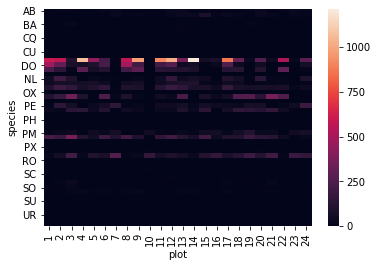

In [138]:
seaborn.heatmap(pd.crosstab(surveys['species'],surveys['plot']));

***Можем поставить условие, и показать какие виды встречаются меньше 50 раз:***

*Т.к. результат будет в формате true/false, белый цвет покажет, что значение истинное, а черный, соответственно, что ложное*

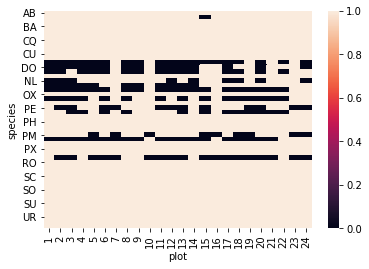

In [139]:
seaborn.heatmap(pd.crosstab(surveys['species'],surveys['plot']) < 50);

***Проверяя весь датасет на вес существа, увидим, что подавляющая масса зарегистрированных существ весит меньше 50 грамм:***

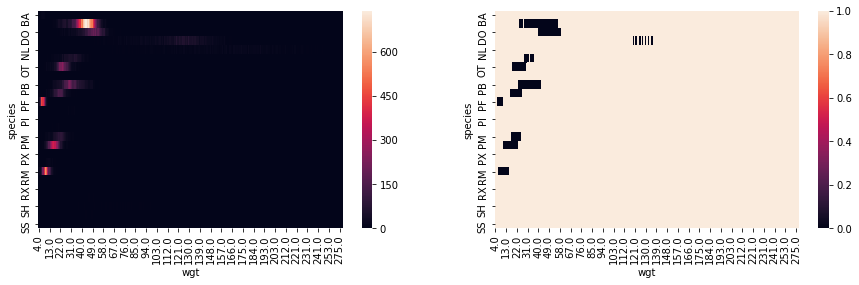

In [140]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
seaborn.heatmap(pd.crosstab(surveys['species'],surveys['wgt']), ax = ax[0]);
seaborn.heatmap(pd.crosstab(surveys['species'],surveys['wgt'])<50, ax = ax[1]);

***Мы можем создать для них отдельный датасет и далее работать с ним:***

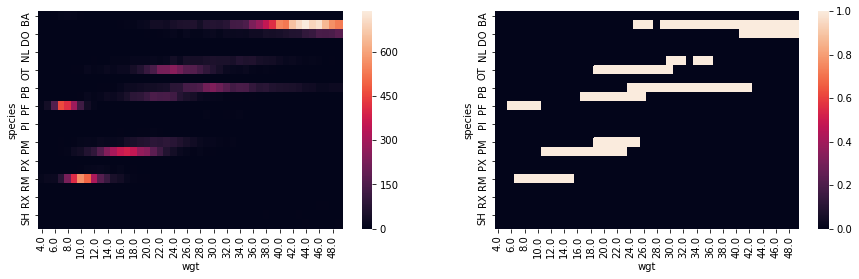

In [141]:
smallCreatures = surveys[surveys['wgt']< 50]

fig, ax = plt.subplots(1,2,figsize=(15, 4))
seaborn.heatmap(pd.crosstab(smallCreatures['species'],smallCreatures['wgt']), ax = ax[0]);
seaborn.heatmap(pd.crosstab(smallCreatures['species'],smallCreatures['wgt'])>50, ax = ax[1]);

***Построим ящик с усами для веса самого часто наблюдаемого существа***

In [142]:
surveys['species'].value_counts().head(3)

DM    10596
PP     3123
DO     3027
Name: species, dtype: int64

*Мы видим, что такое вид этого существа промаркирован как DM, можем вывести информацию о нем:*

In [143]:
species.loc[surveys[surveys['species'] == 'DM'].species.to_string()[-2:] , :]

genus      Dipodomys
species     merriami
taxa          Rodent
Name: DM, dtype: object

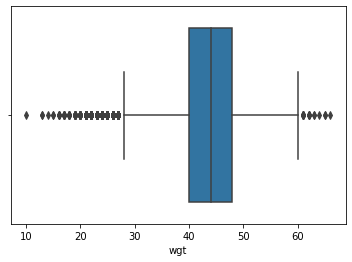

In [144]:
seaborn.boxplot(surveys[surveys['species'] == 'DM']['wgt'])

Мы видим, что медианный вес находится в районе ~43 грамм, а границы ящика примерно на 40 и 47 граммах. Значит примерно четверть замеров показала, что вес меньше, чем 40, и еще четверть больше 47. Усы находятся на 1,5 интерквантильных расстояния (ширины ящика) от медианы, то, что выбивается за эти усы, можем считать выбросами, слишком малыми значениями или слишком большими

<a id='set3'></a>
<center><h1>Теперь возьмем третий массив данных:</h1></center>

*Этот датасет содержит данные о книгах, находящихся в Британской Библиотеке; он отличается тем, что данные в нем неоднородны и перед их использованием, их нужно "почистить"*

In [145]:
librarySet = pd.read_csv('./data/3_library/BL-Flickr-Images-Book.csv', index_col=[0])
librarySet.sample(5)

,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
Identifier,,,,,,,,,,,,,,
2090435,NaN,Paris,1885,NaN,Vingt ans à Madagascar ... d'après les notes...,"LA VAISSIÈRE, Philippe Claude Marie Léonce de.","ABINAL, Frédéric Guillaume Patrice.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10097.df.23.
3142238,NaN,London,1861,NaN,Roman Candles [Sketches of manners and customs...,NaN,"Fitzgerald, Percy Hetherington",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 010136.f.5.
2599812,NaN,Leipzig,1887,NaN,Gustav Nachtigals Reisen in der Sahara und im ...,"NACHTIGAL, Gustav.","FRAENKEL, Albert.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10059.ee.16.
3992166,Third edition.,London,1813,NaN,[The Expedition of Cyrus into Persia; and the ...,Xenophon.,"SPELMAN, Edward.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 1309.e.3.(1.)
2719950,NaN,Mexico,1853,NaN,Noticia historíca de la Conjuracion del Marqu...,"OROZCO Y BERRA, Manuel.","CORTÉS, Martín - Marquis del Valle",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9772.e.23.


***Видим, что многие столбцы содержат пустые, либо неинформативные значения***

In [146]:
librarySet['Corporate Author'].nunique()

0

In [147]:
librarySet['Shelfmarks'].unique()

array(['British Library HMNTS 12641.b.30.',
       'British Library HMNTS 12626.cc.2.',
       'British Library HMNTS 12625.dd.1.', ...,
       'British Library HMNTS|British Library HMNTS 192.e.3-10.|British Library HMNTS G.3246-53.|British Library HMNTS 578.k.38.|British Library HMNTS 1303.m.5-9.|British Library HMNTS 579.k.2.(2.)',
       'British Library HMNTS|British Library HMNTS 10353.e.8.',
       'British Library HMNTS|British Library HMNTS 796.i.18-21.|British Library HMNTS G.13643-50.'],
      dtype=object)

***Удалим колонки с неважными для анализа данными***

In [148]:
to_drop = ['Edition Statement', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver' \
           , 'Contributors', 'Issuance type', 'Shelfmarks']

librarySet.drop(to_drop, inplace=True, axis=1)

librarySet.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


***Как видим, даты тоже местами некорректны:***

<br>Приведем даты к четырехзначному числовому формату *(в данный момент, у дат тип object)* и вычислим какая доля из них не имеет даты вовсе:

In [149]:
librarySet.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

<a id='is_numeric'></a>
### .to_numeric( ) ###
*Проверяет на то, является ли объект числом:*

<a id='isnull'></a>
### .isnull( ) ###
*Проверяет на то, является ли объект нулевым:*

In [150]:
extr = librarySet['Date of Publication'].str.extract(r'^(\d{4})', expand=False) # Ищет первые 4 цифры
librarySet['Date of Publication'] = pd.to_numeric(extr, downcast='signed')

librarySet['Date of Publication'].isnull().sum() / len(librarySet)

0.11717147339205986

***Каждая десятая книга не имеет даты. Построим график распределения:***

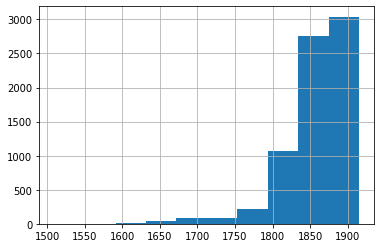

In [151]:
librarySet['Date of Publication'].hist();

***Так как датасет очень неоднородный, например, места тут зачастую дублируются на разных языках, его нужно чистить от повторяющихся или некачественных записей***

In [152]:
librarySet['Place of Publication'].value_counts().tail(10)

Vervins                                         1
William Blackwood & Sons                        1
London; Oxford                                  1
Potsdam, Nauen [printed]                        1
Lee                                             1
pp. 161. J. F. Shaw and Co.: London, [1886.]    1
Carmarthen                                      1
pp. 60. Privately printed, 1876                 1
Bliss, Sands, & Foster                          1
Boston [U.S.]; Cambridge [U.S. printed]         1
Name: Place of Publication, dtype: int64

***Покажем на примере городов Лондон и Оксфорд***

In [153]:
pub = librarySet['Place of Publication']

london = pub.str.contains('London')
london[:5]

oxford = pub.str.contains('Oxford')

librarySet['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))

librarySet['Place of Publication'].value_counts().head(10)

London            4219
Paris              479
Edinburgh          208
New York           193
Leipzig            119
Philadelphia        89
Berlin              70
Boston [Mass.]      52
Oxford              49
Dublin              48
Name: Place of Publication, dtype: int64

<h1><center> Вывод </center></h1>

<p>Библиотека Pandas - очень мощная библиотека для обработки больших массивов данных, их подготовки и непосредственно анализа и моделирования. Пакет прежде всего предназначен для очистки и первичной оценки данных по общим показателям. Статистическим пакетом он в полном смысле не является, однако наборы данных типов DataFrame и Series применяются в качестве входных в большинстве модулей анализа данных и машинного обучения (SciPy, Scikit-Learn и других).

</p>